# Difference in gaussian (DoG)
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/lowe_1999.pdf)
- Commonly called SIFT keypoint detector; however this is techincally incorrect. 
- In his work, Lowe introduces both keypoint detector and image descriptor.
- The keypoint detector itself is called DoG
- The actual image descriptor takes DoG keypoints and generates feature vector for each one of them. This is called SIFT.
- Not very fast and not suitable for real-time applications.

## How does it work
- Used to detect blob like regions in an image.
- These blobs can be corners, edges or combinations of the two.
- It is different from other keypoint detectors, since it uses **scale space**, where we can recognize an object no matter the viewpoint scale and angle changes.
<img src="../../images/embedded_images/dog_book_example.jpg" alt="Drawing" style="width: 500px;"/>


### STEP 1: Scale Space Images
- Here we generate scale space images.
- We take the original image and create progressively blurred versions of it.
- Images that are of the same size are called octaves. In the image below, we have five octaves. Each octave has 4 images, each of which is progressively blurred.
<img src="../../images/embedded_images/dog_step1_scale_space.jpg" alt="Drawing" style="width: 500px;"/>

### STEP 2: Difference of Gaussians
- We take two consecutive images in the same octave and subtract them from each other, then move on to next two consecutive images in the octave and repeat the process.
- For example, if we have 5 progressively blurred images in a single octave, then we end up with 4 DoG representation for that octave.
<img src="../../images/embedded_images/dog_step2_difference_of_gaussian.jpg" alt="Drawing" style="width: 300px;"/>
<img src="../../images/embedded_images/dog_step2_animated.gif" alt="" style="width: 500px;"/>

### Step 3: Finding local maxima and minima
- For each pair of DoG images, we detect local min and maxima. 
- Consider pixel marked ***X*** in the following, along with 8 surrounding neighbors.
- The pixel **X** is considered a keypoint if is larger or smaller than all its surrounding neighbors.
- We then apply this check for above and below. Now, a total 26 checks are made. If the pixel **X** is greater than or less than all 26 neighbors, then it a keypoint.
- we collect all pixels located as maxima and minima across all octaves and mark these as keypoints. Pruning is then performed to remove low contrast keypoints.

<table><tr>
    <td><img src="../../images/embedded_images/dog_local-300x300.jpg" alt="Pic1" style="width:300px;"\></td>
    <td><img src="../../images/embedded_images/dog_octaves.jpg" alt="Pic1" style="width:300px;"\></td>
</tr></table>            

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import display_image, create_subplot

In [4]:
args = {
    "image1":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [3]:
def keypoint_detector(imagePath):
    #load and convert image to grayscale
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detect DoG in the image.
    detector = cv2.xfeatures2d.SIFT_create()
    (kps,_) = detector.detectAndCompute(gray, None)
    
    print("# of keypoints: {}".format(len(kps)))
    
    #draw keypoints
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 660


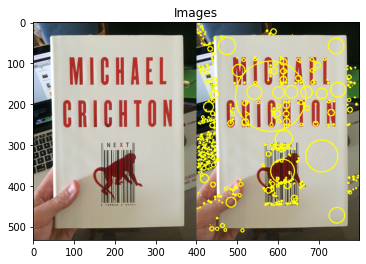

In [5]:
keypoint_detector(args["image1"])

# of keypoints: 175


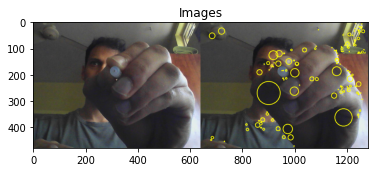

In [6]:
keypoint_detector(args["pen"])